## Tensorflow Fundamentals

we're going to cover:
* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors and Numpy 
* Using @tf.function (a way to speed up your regular Python functions)
* Using GPUs with Tensorflow (or TPUs)
* Exercise to try yourself

### Introduction to Tensors

In [5]:
# Import Tensorflow
import tensorflow as tf
import torch 
print(tf.__version__)

2.19.0


In [6]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [9]:
scalar_pytorch = torch.tensor(7)
scalar_pytorch, scalar_pytorch.shape, scalar_pytorch.dtype

(tensor(7), torch.Size([]), torch.int64)

In [11]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim, scalar_pytorch.ndim

(0, 0)

In [13]:
# Create a vector 
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [16]:
vector_pytorch = torch.tensor([10, 10])
vector_pytorch, vector_pytorch.dtype, vector_pytorch.shape

(tensor([10, 10]), torch.int64, torch.Size([2]))

In [17]:
vector.ndim, vector_pytorch.ndim

(1, 1)

In [18]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([[10, 7],
                     [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [22]:
pytorch_matrix = torch.tensor([[10, 7],
                              [7, 10]])
pytorch_matrix, pytorch_matrix.shape, pytorch_matrix.dtype

(tensor([[10,  7],
         [ 7, 10]]),
 torch.Size([2, 2]),
 torch.int64)

In [21]:
matrix.ndim, pytorch_matrix.ndim

(2, 2)

In [24]:
# Create another matrix
another_matrix = tf.constant([[10., 7.],
                             [3., 2.],
                             [8., 9.]], dtype=tf.float16) # specify the datatype with dtype parameter

another_matrix_torch = torch.tensor([[10., 7.],
                             [3., 2.],
                             [8., 9.]], dtype=torch.float16)

In [25]:
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [26]:
another_matrix_torch.dtype

torch.float16

In [27]:
# What's the number of dimensions of another_matrix
another_matrix.ndim


2

In [29]:
# Let's create a tensor 
tensor = tf.constant([[[1, 2, 3],
                      [4, 5, 6]],
                     [[7, 8, 9],
                     [10, 11, 12]],
                     [[13, 14, 15],
                     [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [30]:
tensor.ndim

3

In [31]:
tensor_torch = torch.tensor([[[1, 2, 3],
                      [4, 5, 6]],
                     [[7, 8, 9],
                     [10, 11, 12]],
                     [[13, 14, 15],
                     [16, 17, 18]]])
tensor_torch

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18]]])

What we've created so far:

* scalar: a single number
* vector: a number with direction (eg. wind speed and direction)
* matrix: a two dimensional array of numbers
* Tensor: an n-dimensional array of numbers (where n can be any number, a 0-dim tnesor is a scalar, a 1-dim tensor is a vector)

### Creating tensor with `tf.Variable`

In [36]:
# Create the same tensor with tf.Variable() as above
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [38]:
# Let's try change one of the elements in our changeable tensor
changeable_tensor[0] = 7
changeable_tensor

TypeError: 'ResourceVariable' object does not support item assignment

In [39]:
# How about we try .assign()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [41]:
# Let's try change our unchangeable tensor
unchangeable_tensor[0] = 7
unchangeable_tensor

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [42]:
unchangeable_tensor[0].assign(7)
unchangeable_tensor

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

**NOTE:** Rarely in practice will you need to decide whether to use tf.constant or tf.Variable to create tensors, as Tensforlow does this for us, however if in doubt, use `tf.constant` and change it later if needed.

### Creating random tensors

Random tensors are tensors of some arbitrary size which contain random numbers.

In [47]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42) # set seet for reporducibility
random_1 = random_1.normal(shape=(3, 2))
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [48]:
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))
random_2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [50]:
# Are they equal?
random_2 == random_2


<tf.Tensor: shape=(3, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True],
       [ True,  True]])>

In [56]:
# Creating tensors using torch
torch.manual_seed(42)
torch.randn(size=(3, 2))

tensor([[ 0.3367,  0.1288],
        [ 0.2345,  0.2303],
        [-1.1229, -0.1863]])

### Shuffle the order of elements in a tensor 


In [58]:
# shuffle a tensor (valuable for when you want to shuffle your data so the inherent order does not effect learning)
not_shuffled = tf.constant([[10, 7],
                            [7, 10],
                            [2, 5]])
not_shuffled.ndim

2

In [82]:
# Shuffle our non_shuffled tensor
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10],
       [ 2,  5]], dtype=int32)>

In [83]:
[tf.random.shuffle(not_shuffled, seed=42) for i in range(3)]

[<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 2,  5],
        [10,  7],
        [ 7, 10]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 2,  5],
        [10,  7],
        [ 7, 10]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7, 10],
        [ 2,  5],
        [10,  7]], dtype=int32)>]

**NOTE:** Even after setting the operational seed the results differ

In [85]:
tf.random.set_seed(42)
[tf.random.shuffle(not_shuffled) for i in range(3)]

[<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7, 10],
        [ 2,  5],
        [10,  7]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 2,  5],
        [10,  7],
        [ 7, 10]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 2,  5],
        [ 7, 10],
        [10,  7]], dtype=int32)>]

**NOTE:** Even after setting the global seed the results differ

In [88]:
tf.random.set_seed(42)
for i in range(3):
    tf.random.set_seed(42)
    print(tf.random.shuffle(not_shuffled, seed=42))
    

tf.Tensor(
[[10  7]
 [ 7 10]
 [ 2  5]], shape=(3, 2), dtype=int32)
tf.Tensor(
[[10  7]
 [ 7 10]
 [ 2  5]], shape=(3, 2), dtype=int32)
tf.Tensor(
[[10  7]
 [ 7 10]
 [ 2  5]], shape=(3, 2), dtype=int32)


**NOTE:** It looks like if we want our shuffled tensors to be in the same order, we've got to use the global level random seed as well as the operational level random seed

### Other ways to make tensors

In [91]:
# Create a tensor of all ones
tf.ones([10, 7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [92]:
# Create a tensor of all zeros
tf.zeros([10, 7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

### Turn Numpy arrays into tensors

The main difference between Numpy arrays and Tensorflow tensors is that tensors can be run on GPU(much faster computing)

In [93]:
# You can also turn numpy arrays into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # create a numpy array between 1 and 25
numpy_A

# X = tf.constant(some_matrix) # capital for matrix or tensor
# y = tf.constant(vector) # not capital for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [95]:
A = tf.constant(numpy_A, shape=(2, 3, 4))
A

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

### Getting information from tensor

When dealing with tensors you probably want to be aware of the following attributs:
* Shape
* Rank
* Axis or dimension
* size 

In [96]:
# Create a rank 4 tensor means .ndim = 4 
rank_4_tensor = tf.zeros(shape=[2, 3, 4, 5])
rank_4_tensor


<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [97]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [98]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [104]:
# Get various attributes of our tensor
print('Datatype of every element:', rank_4_tensor.dtype)
print('Number of dimensions (rank):', rank_4_tensor.ndim)
print('Shape of tensor:', rank_4_tensor.shape)
print('Elements along the 0 axis:', rank_4_tensor.shape[0])
print('Elements along the last axis:', rank_4_tensor.shape[-1])
print('Total number of elements in our tensor:', tf.size(rank_4_tensor).numpy())

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along the 0 axis: 2
Elements along the last axis: 5
Total number of elements in our tensor: 120


### Indexing tensors

Tensors can be indexed just like Python lists.

In [105]:
# Get the first 2 elements of each dimension
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [107]:
# Get the first element from each dimension from each index except for the final one
rank_4_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [108]:
# Create a rank 2 tensor (2 dimension)
rank_2_tensor = tf.constant([[10, 7],
                            [3, 4]])
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [110]:
# Get the last item of each of our rand 2 tensor
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [112]:
# Add in extra dimension to our rank 2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [113]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) # -1 means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

### Manipulating tensors (tensor operations)

**Basic operations**

`+`, `-`, `*`, `/`

In [114]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7], [3,4]])
tensor+10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [115]:
# Original tensor is unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [116]:
# Multiplication also works
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [117]:
# Subtraction 
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [119]:
# We can use the tensorflow build-in function too
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [121]:
tensor # still unchanged

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

**Matrix Multiplication**

In machine learning, matrix multiplication is one of the most common operation with tensors.

There are two rules our tensors need to fulful if we're going to matrix multiply them:

1. The inner dimensions must match
2. The resulting matrix has the shape of the inner dimensions

In [125]:
# Matrix multiplication in tensorflow
print(tensor, tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32) tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [126]:
10 *  10 + 7 * 3, 10 * 7 + 7 * 4

(121, 98)

In [127]:
3 * 10 + 4 * 3, 3 * 7 + 4 * 4

(42, 37)

In [129]:
# Matrix multiplication with python operator "@"
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [130]:
tensor.shape, tensor.shape

(TensorShape([2, 2]), TensorShape([2, 2]))

In [132]:
# Create a tensor of (3, 2)
X = tf.constant([[1, 2],
                 [3, 4],
                [5 ,6]])

Y = tf.constant([[7, 8], 
                [9, 10],
                [11, 12]])

X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [133]:
X.shape, Y.shape

(TensorShape([3, 2]), TensorShape([3, 2]))

In [134]:
X @ Y

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul] name: 

In [137]:
X @ tf.transpose(Y)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [139]:
X.shape, tf.transpose(Y).shape # (3, 2) @ (2, 3) -> (3, 3)

(TensorShape([3, 2]), TensorShape([2, 3]))

**The dot product**

matrix multiplication is also referred to as the dot product.

You can perform matrix multiplication using:

* `tf.matmul()`
* `tf.tensortdot()`

In [141]:
# Perform the dot product on X and Y (requires X or Y to be transposed)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [142]:
# Perform matmul between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [143]:
# Perform matmul matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y, shape=(2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [144]:
# Check the values of Y, reshape Y and transposed Y 
print('Normal Y:')
print(Y, '\n')

print('Y reshaped to (2, 3):')
print(tf.reshape(Y, (2,3)), '\n')

print('Y transposed:')
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2, 3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


**Generally,, when performing matrix multiplication on two tensors and one of the axes doesn't line up, you will transpose (rather than reshape) one of the tensor to get satsify the matmul rules**

### Chaning the datatype of a tensor

In [150]:
# Create a new tensor with default datatype (float32)
B = tf.constant([1.7, 7.4])
B, B.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 tf.float32)

In [151]:
C = tf.constant([1, 2])
C.dtype

tf.int32

In [152]:
# Change from float32 to float16 -> reduced precision
D = tf.cast(B, dtype=tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [153]:
# Change from int32 to float32
E = tf.cast(C, dtype=tf.float32)
E

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [154]:
E_float16 = tf.cast(E, dtype=tf.float32)
E_float16

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

### Aggregating Tensors

Aggregating tensors = condensing them from multiple values down to a samller amount of values.

In [155]:
# Get the absolute values 
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [156]:
# Get the absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Let's go through the following forms of aggregation:

* Get the minimum
* Get the maximum
* Get the mean of tensor
* Get the sum of tensor


In [161]:
# Creating a random tensor with values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([54, 27, 92, 99, 95, 44, 87, 76, 45, 64, 98, 10, 20, 47, 73, 90,  1,
       68, 96, 37, 80, 55, 39, 72, 71, 29, 77, 90, 57, 10, 55, 31, 49, 65,
       21, 94, 73, 89, 26, 69, 48, 60, 42,  1, 31, 81, 96, 49, 18, 89],
      dtype=int32)>

In [162]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [163]:
# Find the minimum
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int32, numpy=57>

In [164]:
# Find the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int32, numpy=99>

In [165]:
# Find the mean of the tensor
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int32, numpy=57>

In [166]:
# Find the sum of the tensor
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int32, numpy=2890>

In [171]:
# Find the variance
tf.math.reduce_variance(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=785.3199462890625>

In [173]:
# Find the standard deviation
tf.math.reduce_std(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=28.023561477661133>

### Find the positional maximum and minimum

In [181]:
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [182]:
tf.math.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [183]:
F[42]

<tf.Tensor: shape=(), dtype=float32, numpy=0.967138409614563>

In [184]:
tf.math.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [185]:
F[16]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463667869567871>

In [190]:
# Check for equality
assert F[tf.argmax(F)] == tf.reduce_max(F), 'Not Equal'

### Squeezing a tensor (removing all single dimensions)

In [196]:
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1, 1, 1, 1, 50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [197]:
tf.squeeze(G).shape

TensorShape([50])

In [198]:
G_squeezed = tf.squeeze(G)
print('Old shape: ', G.shape)
print("Squeezed shape: ", G_squeezed.shape)

Old shape:  (1, 1, 1, 1, 50)
Squeezed shape:  (50,)


### One-hot encoding tensors

In [201]:
# Create a list of indices 
some_list = [0, 1, 2, 3] # could be red, green, blue, purple

# One hot encode our list of indices
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [205]:
# Specify custom value for one hot encoding
tf.one_hot(some_list, depth=4, on_value = 'yo I love deep learning', off_value='I also Like to dance')

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'yo I love deep learning', b'I also Like to dance',
        b'I also Like to dance', b'I also Like to dance'],
       [b'I also Like to dance', b'yo I love deep learning',
        b'I also Like to dance', b'I also Like to dance'],
       [b'I also Like to dance', b'I also Like to dance',
        b'yo I love deep learning', b'I also Like to dance'],
       [b'I also Like to dance', b'I also Like to dance',
        b'I also Like to dance', b'yo I love deep learning']],
      dtype=object)>

### Squaring, log, square root

In [206]:
H = tf.range(1, 10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [207]:
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [213]:
tf.sqrt(tf.cast(H, dtype=tf.float32)) # int not allowed for sqrt

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [215]:
tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Tensors and Numpy

Tensorflow interacts beautifully with Numpy arrays.

In [216]:
# Create a tensor directly from a Numpy array 
J = tf.constant(np.array([1, 2, 3, 4]))
J

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 2, 3, 4])>

In [217]:
# Convert our tensor back to our numpy array
np.array(J), type(np.array(J))

(array([1, 2, 3, 4]), numpy.ndarray)

In [219]:
# Convert tensor J to a Numpy array 
J.numpy(), type(J.numpy())

(array([1, 2, 3, 4]), numpy.ndarray)

In [220]:
# The default types of each are slightly different
numpy_J = tf.constant(np.array([3.0, 7.0, 10.0]))
tensor_J = tf.constant([3., 7., 10.])

# Check the datatypes of each
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

### Finding access to GPUs

In [221]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [222]:
!nvidia-smi

Tue Aug  5 12:38:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.09                 Driver Version: 561.09         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   52C    P8              3W /   50W |    1131MiB /   4096MiB |     26%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [223]:
import tensorflow as tf
print("GPUs Available: ", tf.config.list_physical_devices('GPU'))
print("Built with CUDA: ", tf.test.is_built_with_cuda())

GPUs Available:  []
Built with CUDA:  False


## Exercises

### 1. Create a vector, scalar, matrix, tensor with values of your choosing using tf.constant()

In [236]:
scalar = tf.constant(1.0)
vector = tf.constant([1., 2., 3., 4.])
matrix = tf.constant([[1., 2., 3.],
                     [4., 5., 6.]])
tensor = tf.constant([matrix.numpy(), matrix.numpy(), matrix.numpy()])
print(scalar)
print(vector)
print(matrix)
print(tensor)

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor([1. 2. 3. 4.], shape=(4,), dtype=float32)
tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[[1. 2. 3.]
  [4. 5. 6.]]

 [[1. 2. 3.]
  [4. 5. 6.]]

 [[1. 2. 3.]
  [4. 5. 6.]]], shape=(3, 2, 3), dtype=float32)


### 2. Find the shape, rank and size of the tensors you created in 1.

In [240]:
print("Shape of Tensor: ", tensor.shape)
print("Number of Elements in the Tensor: ", tf.size(tensor).numpy())
print('Rank of Tensor: ', tensor.ndim)

Shape of Tensor:  (3, 2, 3)
Number of Elements in the Tensor:  18
Rank of Tensor:  3


### 3. Create two tensors containing random values between 0 and 1 with shape [5, 300]

In [250]:
rand_tensor_1 = tf.random.uniform(shape=[5, 300])
rand_tensor_2 = tf.random.uniform(shape=[5, 300])

### 4. Multiply the two tensors you created in 3 using matrix multiplication

In [251]:
rand_tensor_1.shape, rand_tensor_2.shape

(TensorShape([5, 300]), TensorShape([5, 300]))

In [252]:
rand_tensor_1 @ tf.transpose(rand_tensor_2)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[72.34169 , 73.84332 , 71.9973  , 69.78642 , 68.598114],
       [76.2998  , 75.77641 , 71.655014, 72.104355, 75.29941 ],
       [72.80916 , 75.74101 , 71.199   , 73.046555, 71.71448 ],
       [74.654816, 76.64436 , 73.328476, 72.2124  , 73.30908 ],
       [77.44371 , 78.68228 , 71.98375 , 72.70095 , 72.91727 ]],
      dtype=float32)>

### 5. Multiply the two tensors you created in 3 using dot product

In [260]:
tf.tensordot(rand_tensor_1, tf.transpose(rand_tensor_2), axes=1)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[72.34169 , 73.84332 , 71.9973  , 69.78642 , 68.598114],
       [76.2998  , 75.77641 , 71.655014, 72.104355, 75.29941 ],
       [72.80916 , 75.74101 , 71.199   , 73.046555, 71.71448 ],
       [74.654816, 76.64436 , 73.328476, 72.2124  , 73.30908 ],
       [77.44371 , 78.68228 , 71.98375 , 72.70095 , 72.91727 ]],
      dtype=float32)>

### 6. Create a tensor with random values between 0 and 1 with shape [224, 224, 3]

In [261]:
rand_tensor_3 = tf.random.uniform(shape=[224, 224, 3])
rand_tensor_3.shape

TensorShape([224, 224, 3])

### 7. Find the min and max values of the tensor you created in 6 along the first axis

In [264]:
tf.reduce_max(rand_tensor_3, axis=1)

<tf.Tensor: shape=(224, 3), dtype=float32, numpy=
array([[0.97661173, 0.9950018 , 0.9879626 ],
       [0.99991286, 0.99526465, 0.9895823 ],
       [0.9881562 , 0.9997591 , 0.9961891 ],
       [0.993449  , 0.9932159 , 0.994305  ],
       [0.9981915 , 0.9879205 , 0.99483085],
       [0.9743185 , 0.98863065, 0.98125434],
       [0.9952357 , 0.997615  , 0.995968  ],
       [0.99722624, 0.9942132 , 0.99311364],
       [0.9982915 , 0.99719906, 0.99857414],
       [0.9995123 , 0.99773574, 0.9973906 ],
       [0.9987043 , 0.9987662 , 0.99652946],
       [0.9993923 , 0.99711156, 0.99873805],
       [0.991655  , 0.9992832 , 0.9992696 ],
       [0.9947641 , 0.9999788 , 0.9940258 ],
       [0.9959667 , 0.99731636, 0.99650073],
       [0.9972267 , 0.9997072 , 0.9986794 ],
       [0.99886227, 0.9962933 , 0.99158084],
       [0.998345  , 0.99776125, 0.9956583 ],
       [0.9925494 , 0.9938563 , 0.99852276],
       [0.9992969 , 0.999635  , 0.99503136],
       [0.98715127, 0.9963497 , 0.99302673],
     

### 8. Created a tensor with random values of shape [1, 224, 224, 3] then squeeze it to change the shape to [224, 224, 3]

In [265]:
rand_tensor_4 = tf.random.uniform(shape=[1, 224, 224, 3])
rand_tensor_4.shape

TensorShape([1, 224, 224, 3])

In [266]:
# Removing extra dim 
tf.squeeze(rand_tensor_4).shape

TensorShape([224, 224, 3])

### 9. Create a tensor with shape [10] using your own choice of values, then find the index which has the maximum value.

In [285]:
own_tensor = tf.constant([0, 1, 2, 3, 4, 5, 4, 3, 2, 1])
own_tensor

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1], dtype=int32)>

In [286]:
# index of max value 
tf.argmax(own_tensor)

<tf.Tensor: shape=(), dtype=int64, numpy=5>

### 10. One hot encode the tensor you created in 9

In [287]:
tf.one_hot(own_tensor, depth=6, on_value=1, off_value=0)

<tf.Tensor: shape=(10, 6), dtype=int32, numpy=
array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=int32)>

## Extracurriculars

### Read through the list of TensorFlow Python APIs, pick one we haven't gone through in this notebook, reverse engineer it (write out the documentation code for yourself) and figure out what it does.

#### Let's pick `tf.image`

#### 1. tf.image.adjust_brightness(image, delta)

it converts rgb images to float representation, adjusts their brightness and then convert them back to the original data type. 

The value `delta` is added to all componenets of the tensor image. image is converted to float and scaled appropriately if it is in fixed point representation and delta is converted to teh same data type, For reqular images delta should be in the range(-1, 1) as it is added to the image in floating point representaion, where pixel values are in the [0, 1) range.

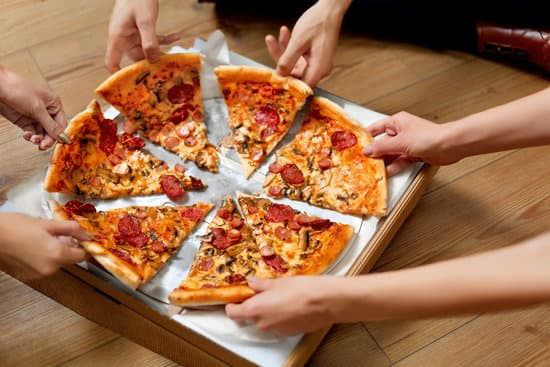

In [328]:
# let's load a RGB image 
from PIL import Image
img = Image.open(r"pizza.jpeg")
img

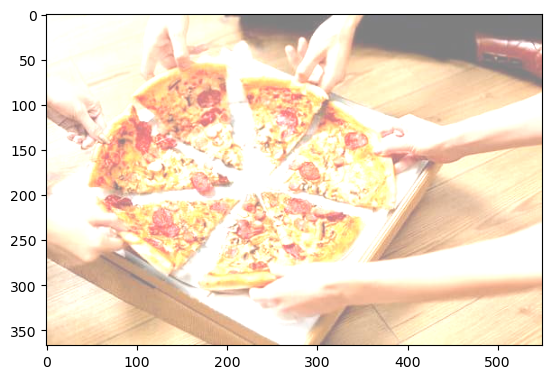

In [329]:
plt.imshow(tf.image.adjust_brightness(img, delta=0.5))

#### 2. `tf.image.adjust_contrast(images, contrast_factor)`

images is a tensor of at least 3 dimensions. The last 3 dimensions are interpreted as [height, widht, channels]. The other dimensions only represent a collection of images, sum as [batch, height, widht, color_channles]

Contrast is adjusted independently for each channel of each image

For each channel, the Op computes the mean of the image pixels in the channel and then adjust each component x for each pixel to (x - mean) * contrast_factor + mean.

contrast_factor must be in the interaval (-inf, inf)

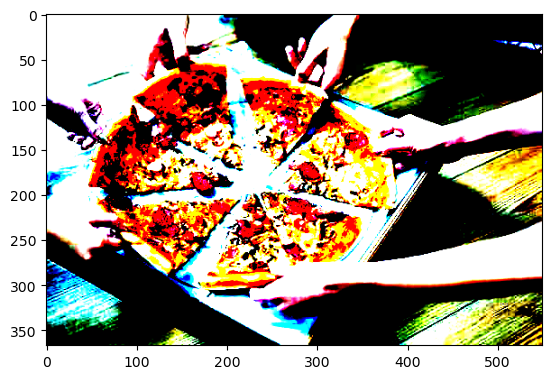

In [330]:
plt.imshow(tf.image.adjust_contrast(img, contrast_factor=20.))

#### 3. `tf.image.adjust_gamma(image, gamma=1, gain=1)`

on the input image.

Also known as Power Law Transform. This function converts the input images at first to float representation, then transforms them pixelwise according to the equation Out = gain * In**gamma, and then converts the back to the original data type.


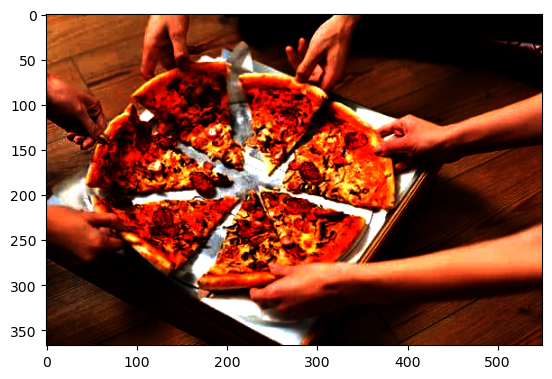

In [332]:
plt.imshow(tf.image.adjust_gamma(img, gamma=4, gain=2))

#### 4. `tf.image.adjust_hue(image, delta, name=None)`

it converts an RGB image to float representation, converts it to HSV, adds an offset to the hue channel, converts back to RGB and then back to the original data type. If several adjustments are chained it is advisable to minimize the number of redundant conversions.

image is an RGB image. The image hue is adjusted by converting the image to HSV and rotating the hue channel (H) by delta. The image is then converted back to RGB.

delta must be in the interval [-1, 1]



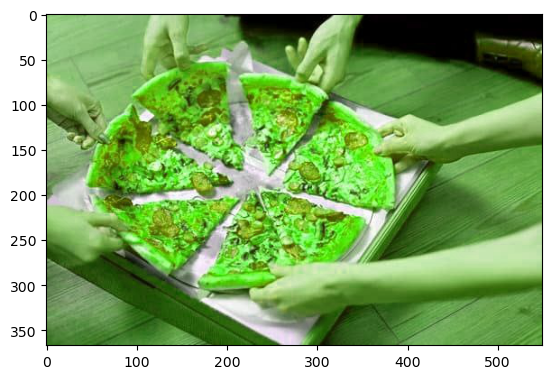

In [337]:
plt.imshow(tf.image.adjust_hue(img, 0.2))

#### 5. `tf.image.adjust_jpeg_quality(img, jpeg_quality, dct_method='', name=None)`

Convenience method that converts an image to unit8 representation, encodes it to jpeg with jpeg_quality, decoded it, and then converts back to the original data type.

`jpeg_quality` must be in the interval [0, 100]

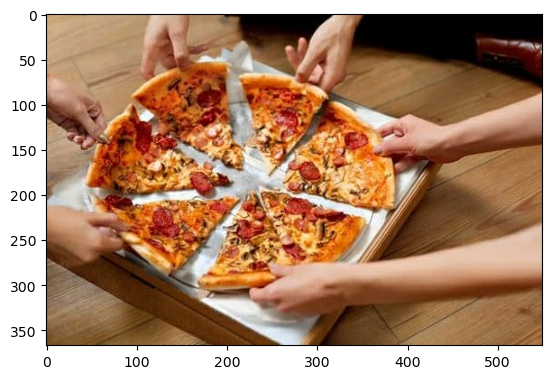

In [343]:
plt.imshow(tf.image.adjust_jpeg_quality(img, jpeg_quality=100))

#### 6. `tf.image.adjust_saturation(image, saturation_factor, name=None)`

This is a convenience method that converts RGB images to float representation, converts them to HSV, adds an offset to the saturation channel, converts back to RGB and then back to the original data type. If several adjustments are chained it is advisable to minimize the number of redundant conversions.

image is an RGB image or images. The image saturation is adjusted by converting the images to HSV and multiplying the saturation (S) channel by saturation_factor and clipping. The images are then converted back to RGB.

saturation_factor must be in the interval [0, inf).



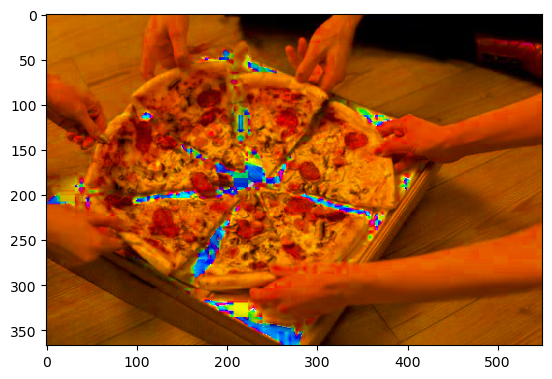

In [344]:
plt.imshow(tf.image.adjust_saturation(img, saturation_factor=200))

#### 7. `tf.image.central_crop(image, central_fraction)`


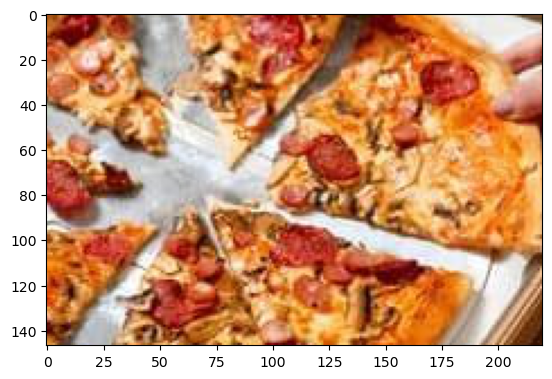

In [348]:
plt.imshow(tf.image.central_crop(img, central_fraction=0.4
                                ))

#### 8. `tf.image.draw_bounding_boxes(images, boxes, colors, name=None)`

Draw bounding boxes on a batch of images.

Outputs a copy of images but draws on top of the pixels zero or more bounding boxes specified by the locations in boxes. The coordinates of the each bounding box in boxes are encoded as [y_min, x_min, y_max, x_max]. The bounding box coordinates are floats in [0.0, 1.0] relative to the width and the height of the underlying image.

For example, if an image is 100 x 200 pixels (height x width) and the bounding box is [0.1, 0.2, 0.5, 0.9], the upper-left and bottom-right coordinates of the bounding box will be (40, 10) to (180, 50) (in (x,y) coordinates).

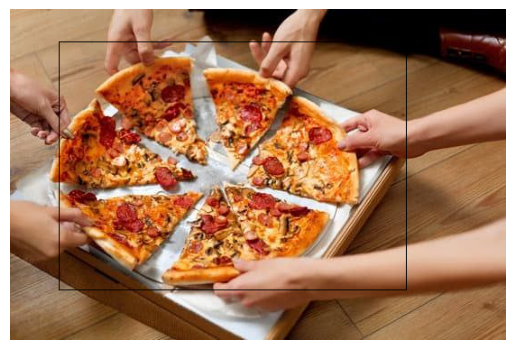

In [386]:
# Prepare image batch
img_batch = tf.cast(tf.constant(img)[tf.newaxis, :, :, :], dtype=tf.float32)

# Define bounding box: shape [1, 1, 4]
boxes = tf.constant([[[0.10, 0.10, 0.85, 0.80]]], dtype=tf.float32) 

# Define color for box (RGB)
colors = tf.constant([[0.0, 0.0, 0.0]])  # red box

# Draw bounding box
boxed_img = tf.image.draw_bounding_boxes(img_batch, boxes, colors)

# Convert to displayable image (remove batch dimension)
boxed_img_np = boxed_img[0].numpy().astype("uint8")

# Plot
plt.imshow(boxed_img_np)
plt.axis('off')
plt.show()

## Extracurriculam 2:

**Go through the TensorFlow 2.x quick start for beginners tutorial (be sure to type out all of the code yourself, even if you don't understand it).**

In [2]:
import tensorflow as tf
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.19.0


### 1. Load a dataset

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 225.0, x_test / 225.

### 2. Building a machine learning model

In [4]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10)
    ]
)

C:\Users\yashs\anaconda3\envs\torch_gpu_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.47310233,  0.88275534,  0.42896038, -0.60778826, -0.21283638,
        -0.42262712, -0.88901883, -0.5527469 ,  0.3869607 , -0.43634582]],
      dtype=float32)

In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.15039513, 0.2265394 , 0.14390077, 0.05102804, 0.07574157,
        0.06140777, 0.03851874, 0.05391542, 0.13798213, 0.06057109]],
      dtype=float32)

### 3. Defining a loss function 

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.

In [8]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.7902188)

Before you start training, configure and compile the model using Keras Model.compile. Set the optimizer class to adam, set the loss to the loss_fn function you defined earlier, and specify a metric to be evaluated for the model by setting the metrics parameter to accuracy.

In [9]:
model.compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])


### 4. Train and evaluate your model

In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9151 - loss: 0.2887
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9595 - loss: 0.1364
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9688 - loss: 0.1032
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9733 - loss: 0.0843
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9773 - loss: 0.0719


In [11]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9769 - loss: 0.0745


[0.07450145483016968, 0.9768999814987183]

In [12]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [13]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.11817976e-08, 2.64210254e-08, 4.80871176e-06, 2.04104690e-05,
        1.20513517e-13, 4.02891914e-07, 1.03543899e-14, 9.99973774e-01,
        2.92710247e-08, 5.48823607e-07],
       [9.15266973e-09, 3.97007680e-05, 9.99959826e-01, 4.39866227e-07,
        7.44755836e-16, 1.09278515e-08, 2.95707192e-08, 1.07378451e-12,
        3.27274141e-09, 5.11308770e-15],
       [3.19976827e-08, 9.99079466e-01, 4.28937528e-05, 1.13488431e-06,
        1.23266973e-05, 2.49190384e-06, 5.31404885e-06, 7.51825573e-04,
        1.04396509e-04, 9.06734599e-08],
       [9.99902487e-01, 5.66778002e-09, 6.48493733e-05, 3.08422386e-07,
        6.76008156e-08, 2.63931565e-06, 2.68528092e-05, 1.15592377e-06,
        1.06844681e-07, 1.44722878e-06],
       [1.53664337e-06, 1.00515800e-08, 4.50005200e-06, 1.02700453e-08,
        9.99575555e-01, 7.86467240e-07, 6.04272998e-07, 8.75720070e-05,
        6.39839470e-08, 3.29395785e-04]], dtype=float32)>